# 4.10: Coding Etiquette & Excel Reporting - Part D

This Script is a continuation from Part C. 
### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Coding Etiquette & Excel Reporting
        K. Visualizations: Answering Business Questions

## 01. Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/12-2022 Instacart Basket Analysis'

In [3]:
# Importing latest dataset with normal activity customers
df_opan = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_profiled.pkl'))

In [4]:
# removing merge flag from df_opan
df_opan = df_opan.drop(columns=['_merge'])

In [5]:
# Importing department
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
#check
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Renaming Unnamed: 0 to department_id
df_dep.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [8]:
#check
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 03. Coding Etiquette & Excel Reporting

### K. Visualizations: Answering Business Questions

In [9]:
df_opan.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region',
       'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

#### Oders by Weekday

Text(0.5, 0, 'Days')

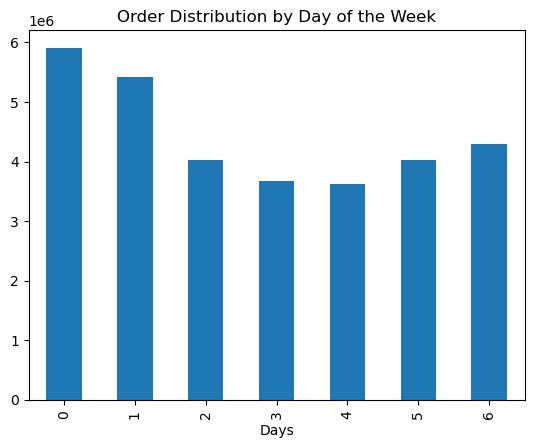

In [10]:
# creating bar chart sorted by index
bar_orders_by_dow = df_opan['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Order Distribution by Day of the Week')
plt.xlabel('Days')

In [11]:
# Export chart
bar_orders_by_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_dow.png'))

#### Order Frequency & Loyality

In [12]:
# create crosstab Loyality & 
loyality_freq = pd.crosstab(df_opan['frequency_flag'], df_opan['loyalty_flag'])

In [13]:
loyality_freq

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279960,1293294,9631222
Non-frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


Text(0.5, 1.0, 'Orders by Customer Loyality & Order Frequency')

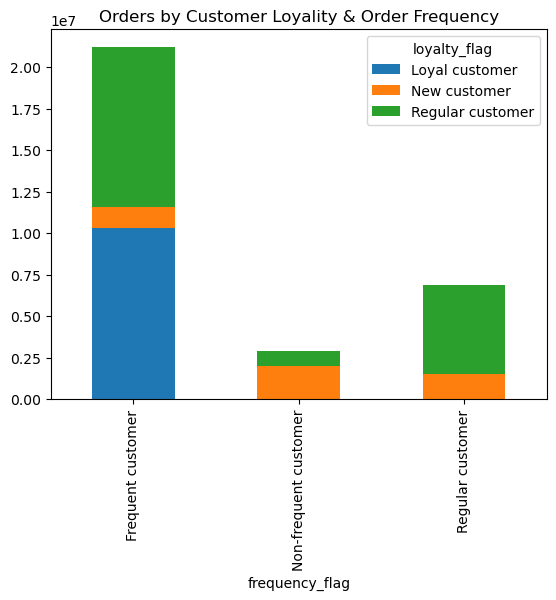

In [14]:
# create bar chart for loyality and frequency
bar_loyal_freq = loyality_freq.plot(kind= 'bar', stacked = True)
plt.title('Orders by Customer Loyality & Order Frequency')

In [15]:
# Export chart
bar_loyal_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyal_freq.png'))

#### Loyalty Flag

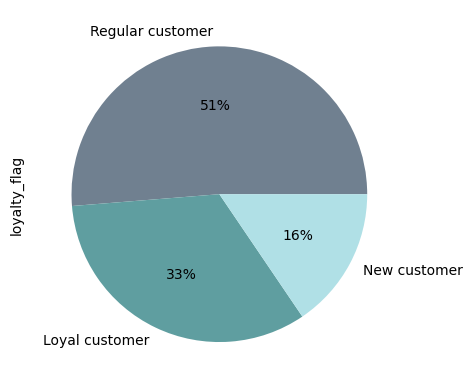

In [16]:
# creating pie chart 
pie_loyalty = df_opan['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'), colors=['slategray','cadetblue','powderblue'])

In [17]:
# Export chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

#### Orders by Department

In [18]:
df_opan.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region',
       'age_group_flag', 'income_flag', 'household_size_flag',
       'child_age_flag', 'pets_flag'],
      dtype='object')

In [21]:
# creating new reduced df for this visualization
df_opan_redux = df_opan[['order_id','user_id','department_id']]

In [22]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand = df_opan_redux.merge(df_dep, on = 'department_id', indicator = True)

In [23]:
df_opand.head()

,order_id,user_id,department_id,department,_merge
0,2539329,1,7,beverages,both
1,2398795,1,7,beverages,both
2,473747,1,7,beverages,both
3,2254736,1,7,beverages,both
4,431534,1,7,beverages,both


In [24]:
df_opand['_merge'].value_counts(dropna=False)

both          30964564
left_only            0
right_only           0
Name: _merge, dtype: int64

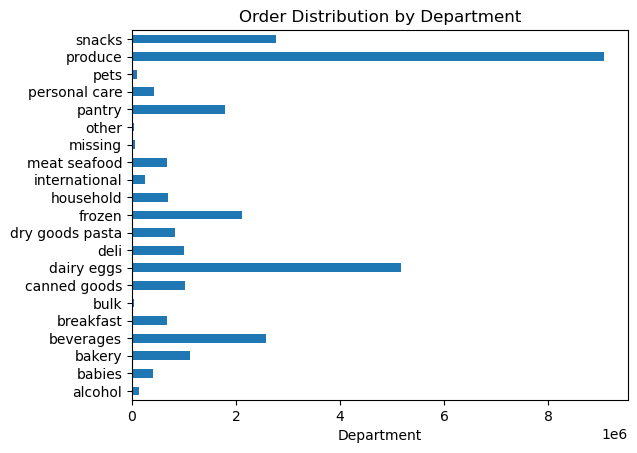

In [37]:
# creating bar chart sorted by index
bar_orders_by_dep = df_opand['department'].value_counts().sort_index().plot.barh()
plt.title('Order Distribution by Department')
plt.xlabel('Department')
plt.savefig('bar_orders_dep.png', bbox_inches='tight')

#### Orders by Department and hour of day

In [39]:
# creating new reduced df for this visualization
df_opan_redux2 = df_opan[['order_id','user_id','department_id','order_hour_of_day']]

In [40]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand2 = df_opan_redux2.merge(df_dep, on = 'department_id', indicator = True)

In [42]:
# creating crosstab for departments and hour of day
hod_dep = pd.crosstab(df_opand2['order_hour_of_day'], df_opand2['department'])

In [43]:
hod_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,465,2317,6958,16652,4131,231,6797,33150,6573,5545,...,4739,1795,4490,521,232,12950,3115,642,65073,16877
1,293,1085,3576,9518,2218,114,3655,16828,3478,2884,...,2722,961,2277,294,129,6845,1864,416,33345,8691
2,246,616,2282,5890,1318,66,2254,10162,2142,1699,...,1784,558,1465,156,113,4163,1125,247,18986,5336
3,177,457,1734,4468,1008,49,1621,7671,1537,1221,...,1353,483,1050,122,67,3049,862,252,13729,3990
4,175,534,1824,4584,1059,46,1738,7748,1578,1379,...,1530,427,1121,143,62,3109,973,269,14664,3839
5,260,1076,2967,7108,1797,75,2742,13778,2659,2059,...,2180,672,1775,180,99,4801,1397,302,25924,6372
6,645,4794,10415,22202,6546,314,8619,49797,8667,7263,...,6569,2151,6027,588,305,15367,3980,948,84649,22541
7,2021,16310,33029,66553,20865,889,25924,154902,26410,22399,...,20036,6215,18795,1792,877,46324,11700,2389,260886,70141
8,5046,28008,61396,135182,39506,1779,50974,296832,51248,41331,...,37854,12117,35620,3244,1736,90178,21953,4298,494234,145686


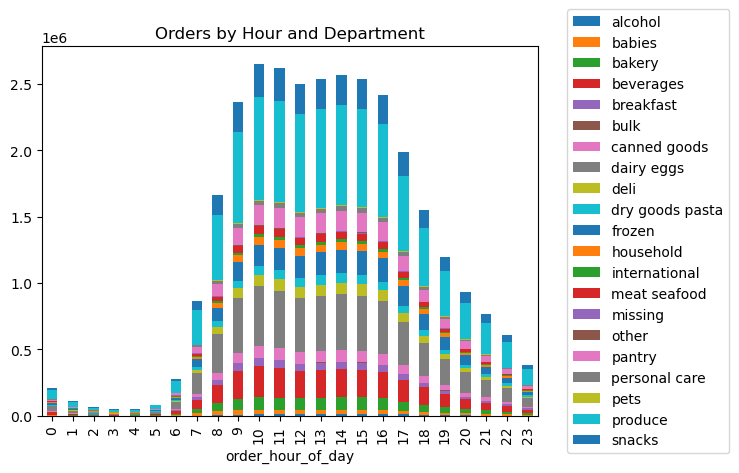

In [60]:
# create bar chart for loyality and frequency
bar_hod_dep = hod_dep.plot(kind= 'bar', stacked = True)
plt.title('Orders by Hour and Department')
bar_hod_dep.legend(loc='center right',  bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.savefig('bar_hod_dep.png', bbox_inches='tight')

#### Orders by Department & Loyalty

In [62]:
# creating new reduced df for this visualization
df_opan_redux3 = df_opan[['order_id','user_id','department_id','order_hour_of_day','loyalty_flag']]

In [63]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand3 = df_opan_redux3.merge(df_dep, on = 'department_id', indicator = True)

In [123]:
# creating crosstab for departments and loyalty
loy_dep = pd.crosstab(df_opand3['department'], df_opand3['loyalty_flag'])

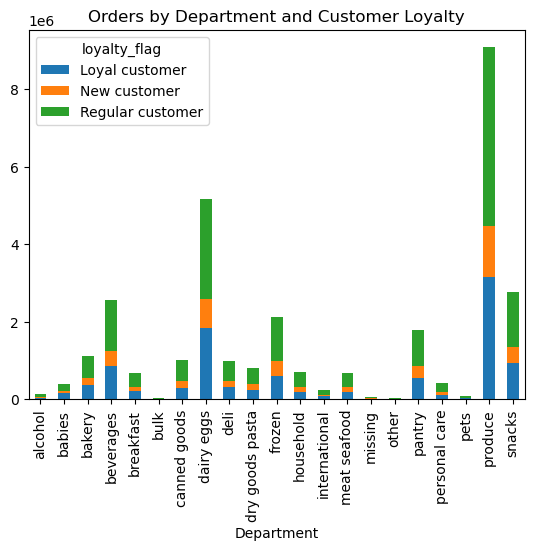

In [124]:
# creating bar chart 
bar_loy_dep = loy_dep.plot(kind= 'bar', stacked = True)
plt.title('Orders by Department and Customer Loyalty')
plt.xlabel('Department')
plt.savefig('bar_ords_loy_dep.png', bbox_inches='tight')

#### Orders by Region

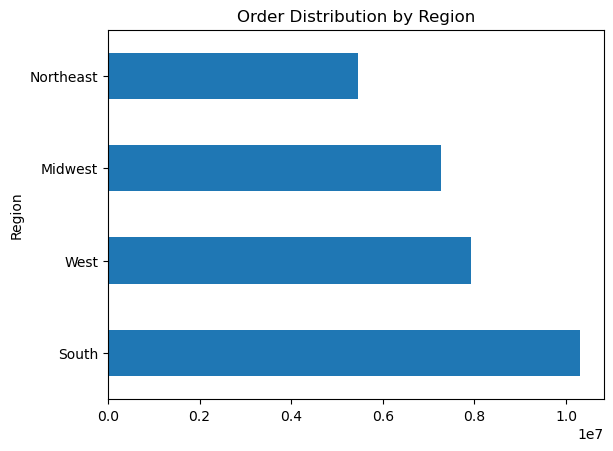

In [74]:
# creating bar chart orders by region
bar_orders_by_reg = df_opan['region'].value_counts().plot.barh()
plt.title('Order Distribution by Region')
plt.ylabel('Region')
plt.savefig('bar_orders_reg.png', bbox_inches='tight')

#### Orders by Region and Department

In [75]:
# creating new reduced df for this visualization
df_opan_redux4 = df_opan[['order_id','user_id','department_id','order_hour_of_day','loyalty_flag','region']]

In [76]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand4 = df_opan_redux4.merge(df_dep, on = 'department_id', indicator = True)

In [111]:
# creating crosstab for departments and loyalty
reg_dep = pd.crosstab(df_opand4['department'], df_opand4['region'])

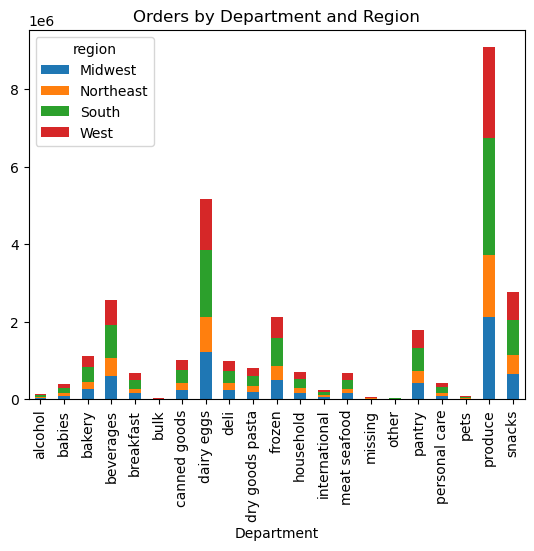

In [82]:
# creating bar chart 
bar_reg_dep = reg_dep.plot(kind= 'bar', stacked = True)
plt.title('Orders by Department and Region')
plt.xlabel('Department')
plt.savefig('bar_ords_reg_dep.png', bbox_inches='tight')

#### Age and Family Status

In [83]:
# creating crosstab for marital status and age group
age_marital = pd.crosstab(df_opan['age_group_flag'], df_opan['marital_status'])

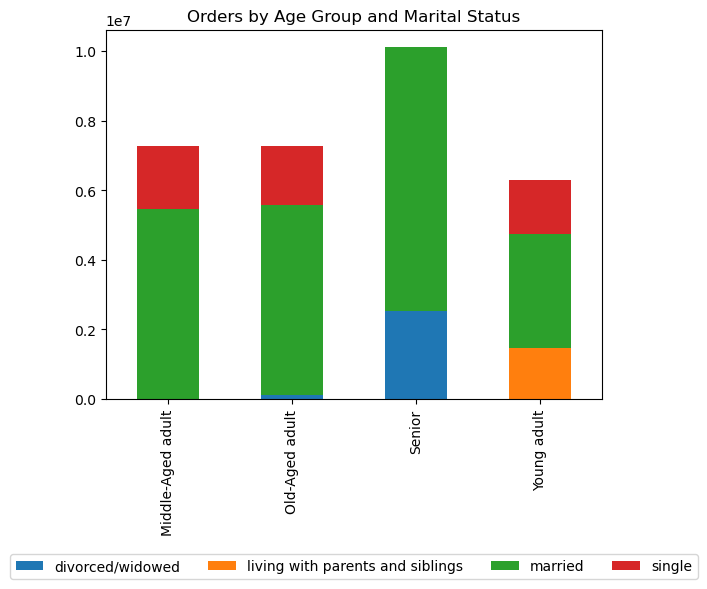

In [102]:
# creating bar chart 
bar_age_marital = age_marital.plot(kind= 'bar', stacked = True)
plt.title('Orders by Age Group and Marital Status')
plt.xlabel('')
bar_age_marital.legend(loc='upper center',  bbox_to_anchor=(0.5, -0.4), ncol=4)
plt.savefig('bar_ords_age_marital.png', bbox_inches='tight')

#### Order Distribution by Household Size

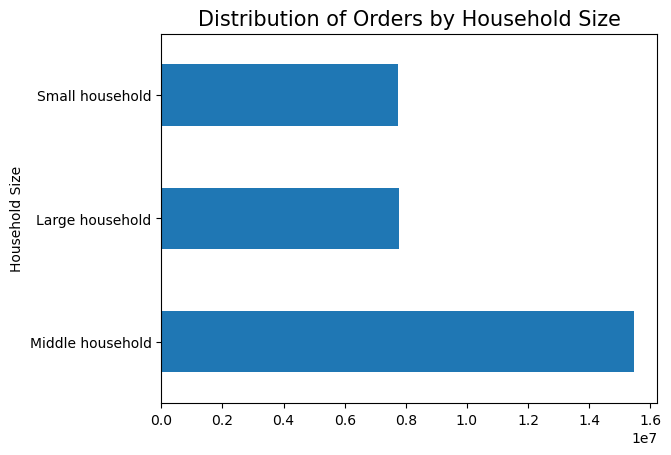

In [105]:
# creating bar chart for Household Size
bar_household_size = df_opan['household_size_flag'].value_counts().plot.barh()
plt.ylabel('Household Size')
plt.title('Distribution of Orders by Household Size',fontsize=15)
plt.savefig('bar_distrib_by_household_size.png', bbox_inches='tight')

#### Product Price Range

In [106]:
# creating new reduced df for this visualization
df_opan_redux5 = df_opan[['order_id','user_id','department_id', 'price_range_loc']]

In [107]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand5 = df_opan_redux5.merge(df_dep, on = 'department_id', indicator = True)

In [113]:
# creating crosstab for price ranges and departments
price_dep = pd.crosstab(df_opand5['department'], df_opand5['price_range_loc'])

In [114]:
price_dep

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,0
babies,0,121484,0
bakery,0,274986,0
beverages,0,814697,42668
breakfast,0,209185,0
bulk,0,1181,0
canned goods,0,281711,0
dairy eggs,4877,1370908,34442
deli,0,299220,94869


In [115]:
# Export to clipboard
price_dep.to_clipboard()

#### Loyalty and Departments

In [127]:
# creating new reduced df for this visualization
df_opan_redux6 = df_opan[['order_id','user_id','department_id', 'loyalty_flag']]

In [128]:
# merging reduced df_opan with df_dep to have the department names in the data set
df_opand6 = df_opan_redux6.merge(df_dep, on = 'department_id', indicator = True)

In [132]:
# creating crosstab for price ranges and departments
loyal_dep2 = pd.crosstab(df_opand6['department'], df_opand6['loyalty_flag'])

In [133]:
loyal_dep2

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


In [134]:
# Export to clipboard
loyal_dep2.to_clipboard()

#### Bulk Department & Region

In [136]:
# creating crosstab for region and departments
bulk = pd.crosstab(df_opan['department_id'], df_opan['region'])

In [137]:
bulk

region,Midwest,Northeast,South,West
department_id,,,,
1,498225,370436,709906,543164
2,7983,6268,11579,8581
3,261753,199300,371620,288155
4,2134115,1593004,3027476,2324678
5,34043,25017,48813,36754
6,60666,44678,84649,65998
7,598979,462929,859419,650574
8,21358,17734,29909,24059
9,193463,143817,272813,212043
